In [79]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
#讀入資料
fish = pd.read_excel("C:/Users/USER/Desktop/fish.xlsx")

In [81]:
#觀察各種類個數
fish['Species'].value_counts()

perch    54
bream    33
roach    18
pike     16
smelt    12
parki    10
white     5
Name: Species, dtype: int64

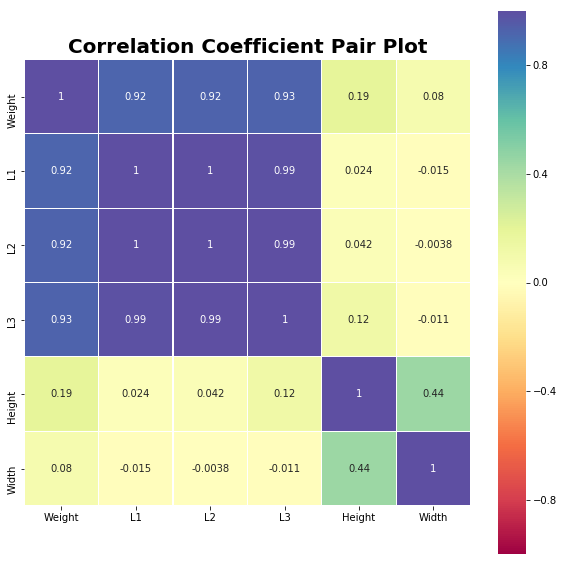

In [82]:
#畫出各feature相關係數圖
plt.figure(figsize=(10,10))
ax = plt.axes()
corr =fish.corr()
sns.heatmap(corr, vmax=1,vmin=-1, square=True, annot=True, cmap='Spectral',linecolor="white", linewidths=0.01, ax=ax)
ax.set_title('Correlation Coefficient Pair Plot',fontweight="bold", size=20)
plt.show()

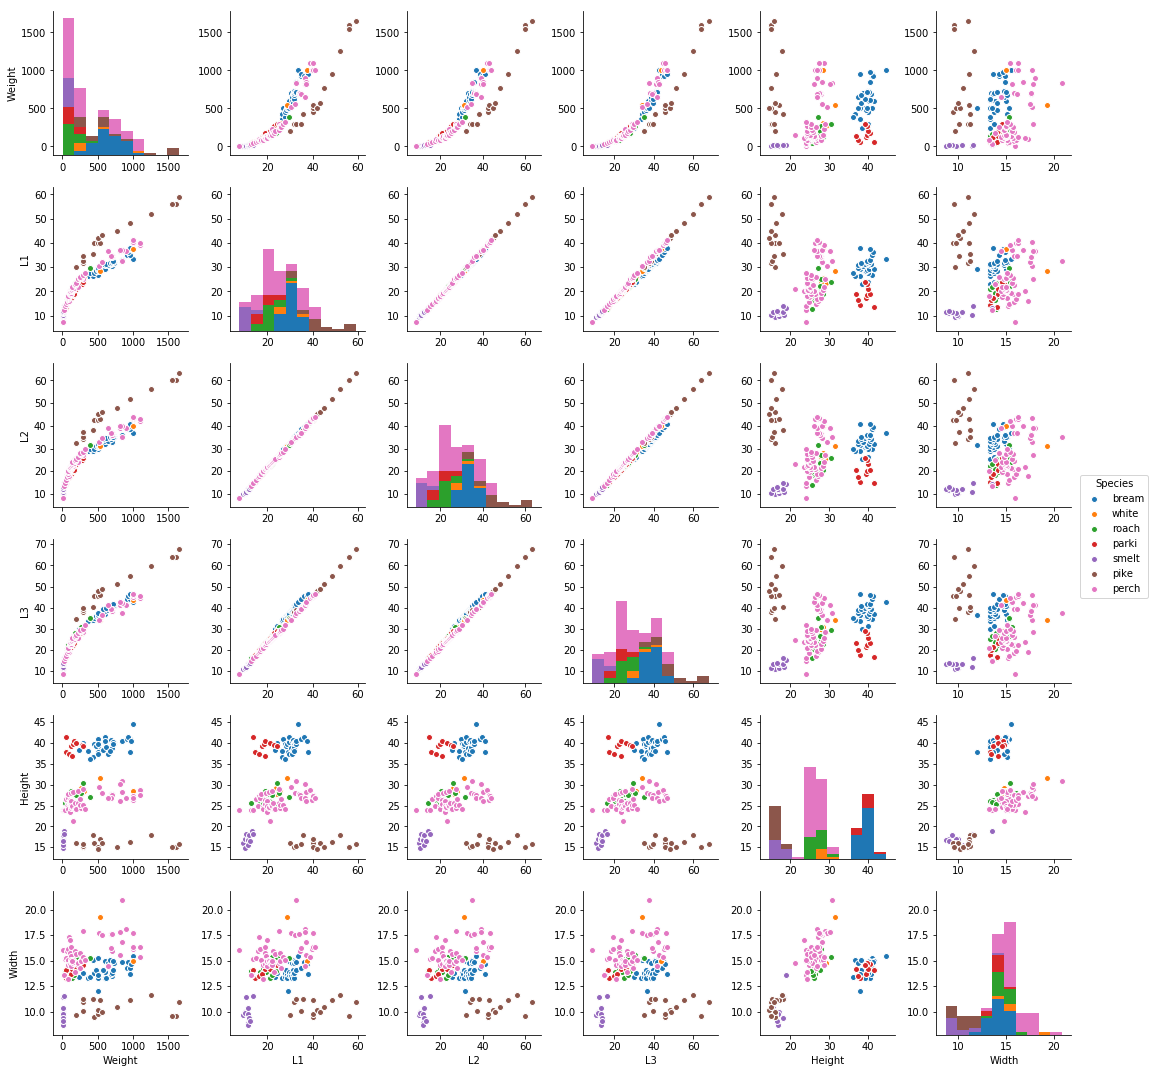

In [83]:
#查看兩兩變數與分類之間的關係
plt.figure(figsize=(20,20))
sns.pairplot(fish[fish.columns],hue = "Species")

# 決策樹

In [84]:
#使用決策樹
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#分出train以及test資料集
x = fish.drop("Species",axis=1)
y = fish["Species"]
#拆出訓練集以及測試集
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)
tree = DecisionTreeClassifier(criterion="gini",min_samples_split=10,min_samples_leaf=3)

In [85]:
tree.fit(x_train,y_train)
prediction = tree.predict(x_test)


In [86]:
accuracy_score(y_pred=prediction,y_true=y_test)

0.7777777777777778

In [87]:
x.columns

Index(['Weight', 'L1', 'L2', 'L3', 'Height', 'Width'], dtype='object')

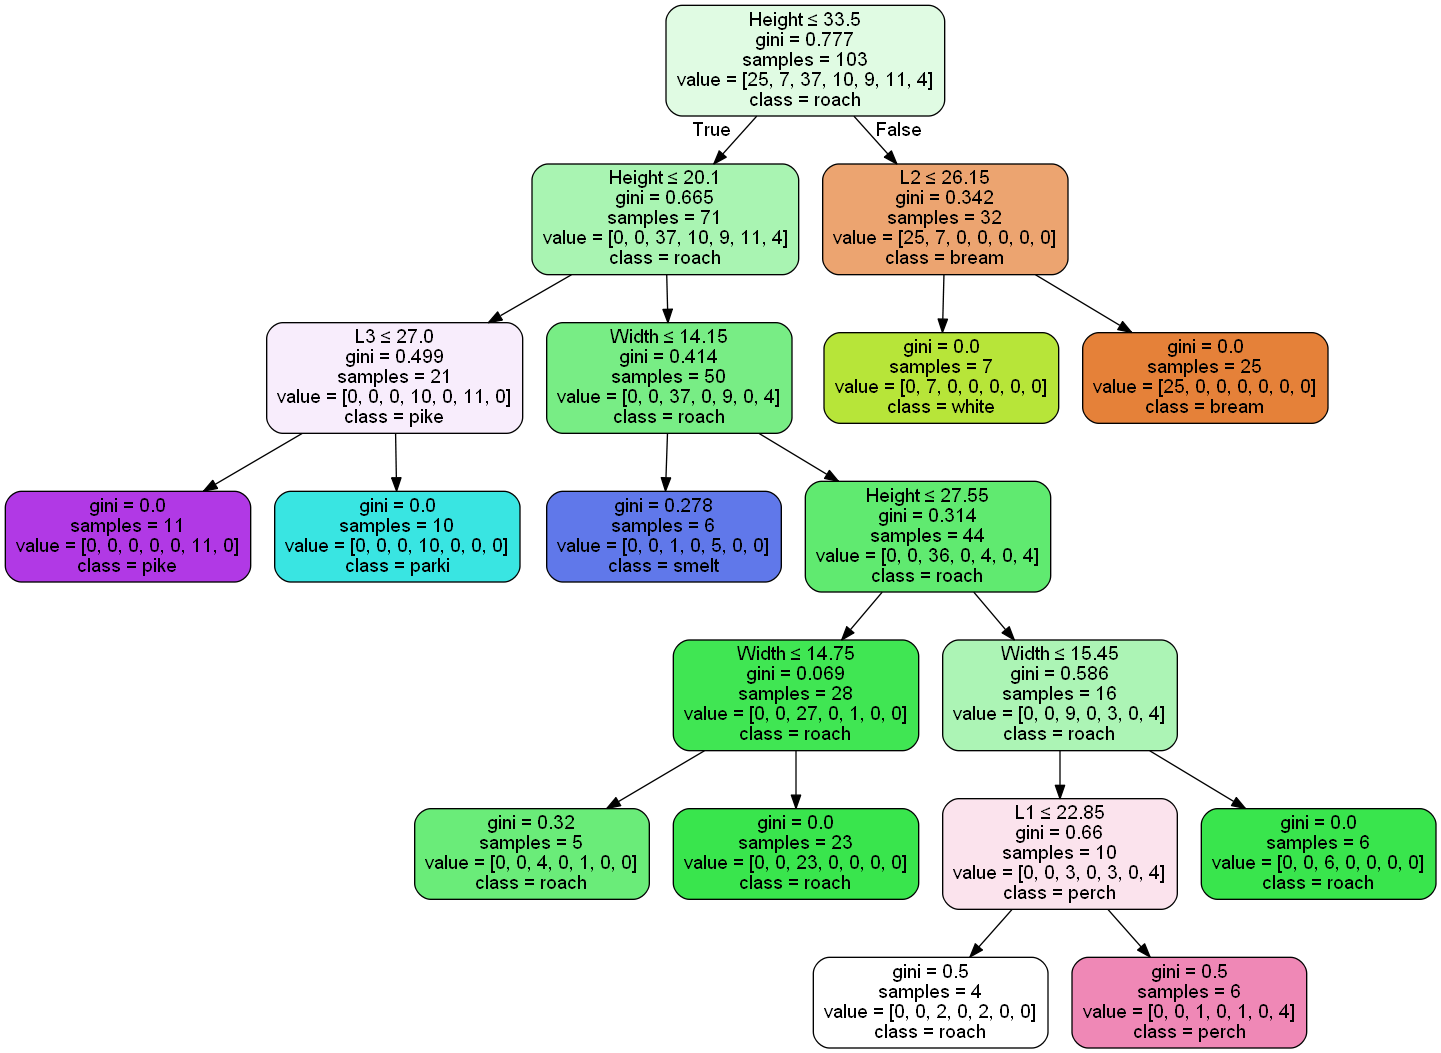

In [88]:
from sklearn.tree import export_graphviz
import pydotplus  
from IPython.display import Image  

dot_data = export_graphviz(tree, out_file=None, feature_names=['Weight', 'L1', 'L2', 'L3', 'Height', 'Width'], class_names=y.unique(), filled=True, rounded=True, special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  


In [89]:
#剪枝
tree1 = DecisionTreeClassifier(criterion="gini",min_samples_split=10,min_samples_leaf=3,max_depth=3)
tree1.fit(x_train,y_train)
prediction1 = tree1.predict(x_test)
accuracy_score(y_pred=prediction1,y_true=y_test)



0.7777777777777778

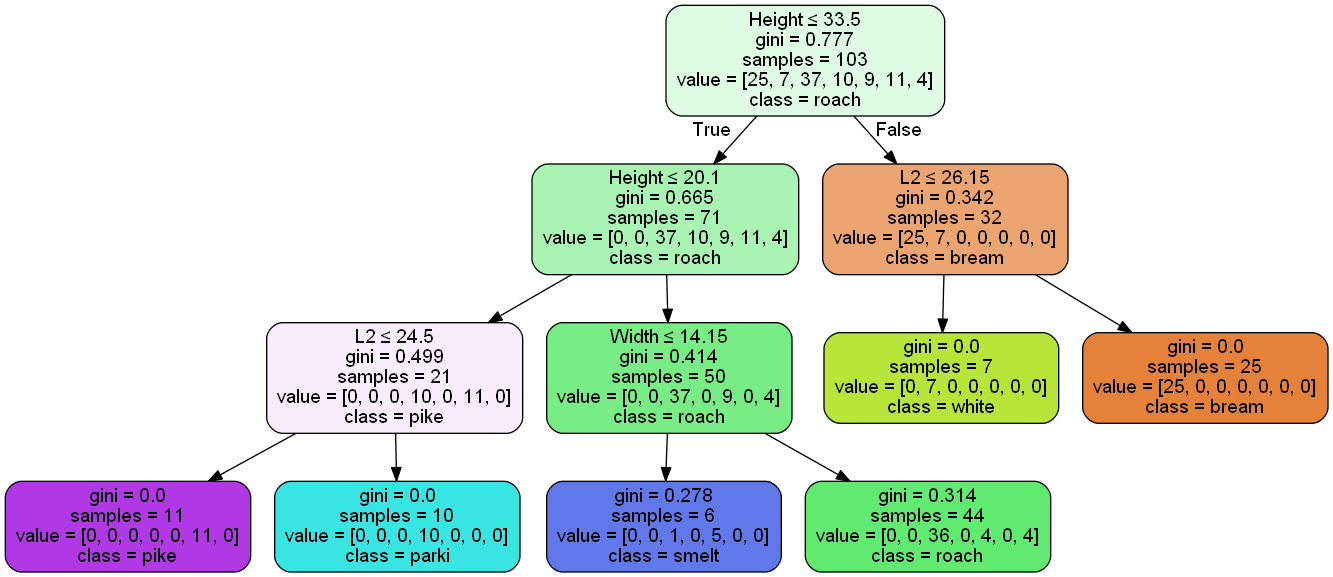

In [90]:
dot_data = export_graphviz(tree1, out_file=None, feature_names=['Weight', 'L1', 'L2', 'L3', 'Height', 'Width'], class_names=y.unique(), filled=True, rounded=True, special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  


In [91]:
#特徵工程
x_train.loc[:,"L21"] = x_train["L2"]-x_train["L1"]
x_train.loc[:,"L32"] = x_train["L3"]-x_train["L2"]
x_train.loc[:,"L31"] = x_train["L3"]-x_train["L1"]

x_test.loc[:,"L21"] = x_test["L2"]-x_test["L1"]
x_test.loc[:,"L32"] = x_test["L3"]-x_test["L2"]
x_test.loc[:,"L31"] = x_test["L3"]-x_test["L1"]

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
D:\Anaconda\lib\site-packages\pandas\core\indexing.py:601: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [103]:
tree2 = DecisionTreeClassifier(criterion="gini",min_samples_split=10,min_samples_leaf=3,max_depth=5,max_features=4)
tree2.fit(x_train,y_train)
prediction2 = tree2.predict(x_test)
accuracy_score(y_pred=prediction2,y_true=y_test)

0.8666666666666667

In [104]:
x_train.columns

Index(['Weight', 'L1', 'L2', 'L3', 'Height', 'Width', 'L21', 'L32', 'L31'], dtype='object')

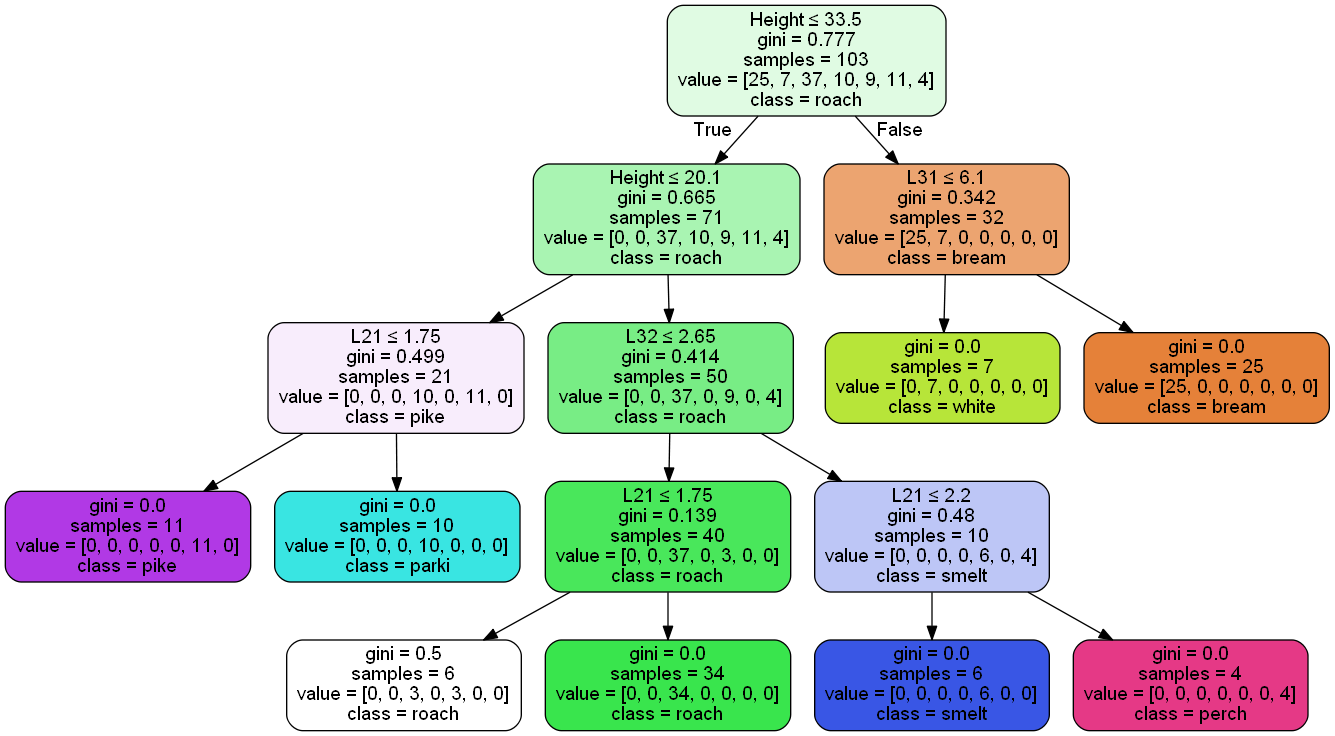

In [106]:
dot_data = export_graphviz(tree2, out_file=None, feature_names=['Weight', 'L1', 'L2', 'L3', 'Height', 'Width', 'L21', 'L32', 'L31'], class_names=y.unique(), filled=True, rounded=True, special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  


# Linear Discriminant Analysis (LDA)

In [123]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [124]:
lda = LinearDiscriminantAnalysis()

In [125]:
fish["L21"] = fish["L2"]-fish["L1"]
fish["L32"] = fish["L3"]-fish["L2"]
fish["L31"] = fish["L3"]-fish["L1"]

In [126]:
fish.groupby(by="Species").mean()

,Weight,L1,L2,L3,Height,Width,L21,L32,L31
Species,,,,,,,,,
bream,636.181818,30.606061,33.412121,38.684848,39.527273,14.100000,2.806061,5.272727,8.078788
parki,155.800000,18.620000,20.230000,22.660000,39.200000,14.180000,1.610000,2.430000,4.040000
perch,360.933333,25.318519,27.444444,29.094444,26.177778,15.785185,2.125926,1.650000,3.775926
pike,742.062500,42.881250,45.918750,49.200000,15.856250,10.481250,3.037500,3.281250,6.318750
roach,159.111111,20.666667,22.305556,25.022222,26.883333,14.572222,1.638889,2.716667,4.355556
smelt,11.500000,11.341667,12.033333,13.125000,16.991667,10.216667,0.691667,1.091667,1.783333
white,477.200000,27.820000,30.300000,33.260000,29.100000,15.760000,2.480000,2.960000,5.440000


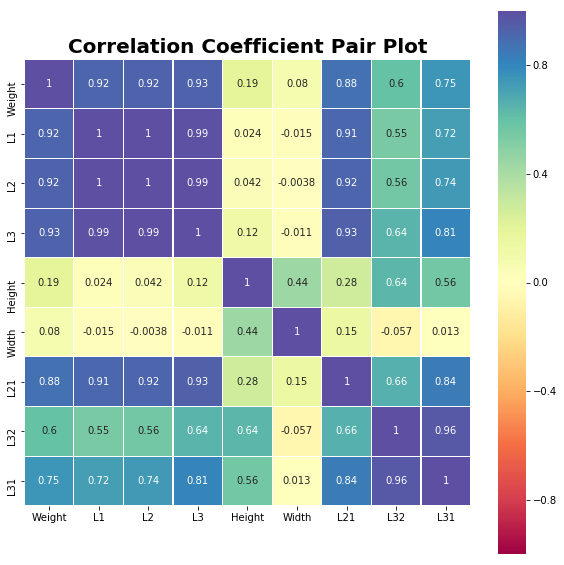

In [141]:
#把線性相依的變數拿掉
#畫出各feature相關係數圖
plt.figure(figsize=(10,10))
ax = plt.axes()
corr =fish.corr()
sns.heatmap(corr, vmax=1,vmin=-1, square=True, annot=True, cmap='Spectral',linecolor="white", linewidths=0.01, ax=ax)
ax.set_title('Correlation Coefficient Pair Plot',fontweight="bold", size=20)
plt.show()

In [144]:
x1 = fish[['L1',"L32",'Height', 'Width']]
y1 = fish["Species"].replace(['bream', 'perch', 'pike', 'smelt', 'roach', 'white', 'parki'],[0,1,2,3,4,5,6])

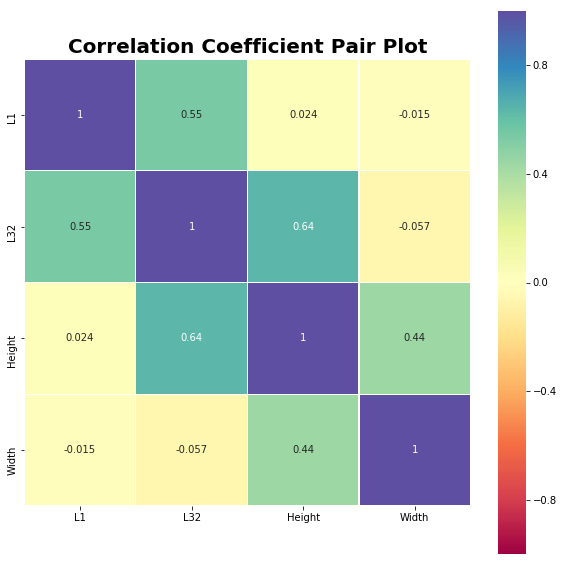

In [146]:
#畫出丟掉線性相依feature各feature相關係數圖
plt.figure(figsize=(10,10))
ax = plt.axes()
corr =fish[['L1',"L32",'Height', 'Width']].corr()
sns.heatmap(corr, vmax=1,vmin=-1, square=True, annot=True, cmap='Spectral',linecolor="white", linewidths=0.01, ax=ax)
ax.set_title('Correlation Coefficient Pair Plot',fontweight="bold", size=20)
plt.show()

## 看起來大致上沒有線性相依的問題

In [147]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x1,y1)

In [148]:
lda.fit(x_train1,y_train1)

D:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [155]:
prediction_lda = lda.predict(x_test1)
accuracy_score(y_pred=prediction_lda,y_true=y_test1)

0.972972972972973

# 準確率0.97!出乎意料的高

In [169]:
from sklearn.metrics import confusion_matrix
import itertools

## 劃出CONFUSION MATRIX

Confusion matrix, without normalization
[[ 9  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0]
 [ 0  0  3  0  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  1]]


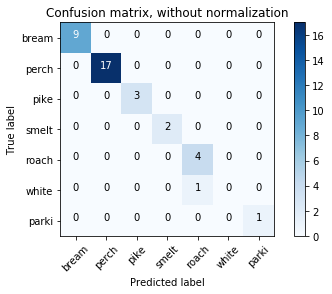

In [172]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test1, prediction_lda)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['bream', 'perch', 'pike', 'smelt', 'roach', 'white', 'parki'],
                      title='Confusion matrix, without normalization')
plt.show()

# Quadratic Discriminant Analysis

In [174]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train1,y_train1)
prediction_qda = qda.predict(x_test1)

D:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


## 準確率

In [176]:
accuracy_score(y_pred=prediction_qda,y_true=y_test1)

0.972972972972973

## confusion matrix

Confusion matrix, without normalization
[[ 9  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0]
 [ 0  0  3  0  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  1]]


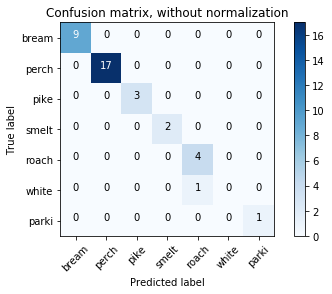

In [178]:
cnf_matrix = confusion_matrix(y_test1, prediction_qda)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['bream', 'perch', 'pike', 'smelt', 'roach', 'white', 'parki'],
                      title='Confusion matrix, without normalization')
plt.show()

# KNeighborsClassifier

In [179]:
from sklearn.neighbors import KNeighborsClassifier

## K=2

In [197]:
knc = KNeighborsClassifier(n_neighbors=2)

In [198]:
knc.fit(x_train1,y_train1)
prediction_k_2 = knc.predict(x_test1)

In [199]:
accuracy_score(y_pred=prediction_k_2,y_true=y_test1)

0.8648648648648649

# k=20

In [210]:
knc1 = KNeighborsClassifier(n_neighbors=20)
knc1.fit(x_train1,y_train1)
prediction_k_20 = knc1.predict(x_test1)
accuracy_score(y_pred=prediction_k_20,y_true=y_test1)

0.8918918918918919

## confusion matrix

Confusion matrix, without normalization
[[ 9  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0]
 [ 0  0  3  0  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  3  0  0  1  0  0]
 [ 0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  1]]


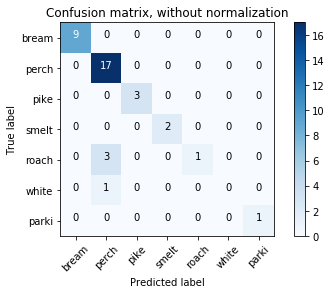

In [211]:
cnf_matrix = confusion_matrix(y_test1, prediction_k_20)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['bream', 'perch', 'pike', 'smelt', 'roach', 'white', 'parki'],
                      title='Confusion matrix, without normalization')
plt.show()

# Multiple logistic regression

In [212]:
from sklearn.linear_model import LogisticRegression

In [215]:
lr = LogisticRegression(multi_class='ovr')

In [216]:
lr.fit(x_train1,y_train1)
prediction_lr = lr.predict(x_test1)
accuracy_score(y_pred=prediction_lr,y_true=y_test1)

0.918918918918919

Confusion matrix, without normalization
[[ 9  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0]
 [ 0  0  3  0  0  0  0]
 [ 0  2  0  0  0  0  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  1]]


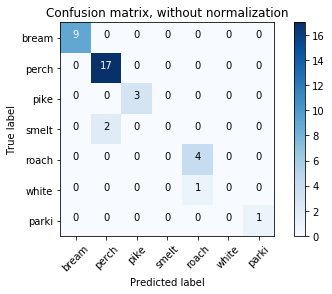

In [217]:
cnf_matrix = confusion_matrix(y_test1, prediction_lr)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['bream', 'perch', 'pike', 'smelt', 'roach', 'white', 'parki'],
                      title='Confusion matrix, without normalization')
plt.show()